In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("/workspace/undergrad_ml_assignments/data")



In [21]:
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
df.head()

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,WTIREP50,WTIREP51,WTIREP52,ELIGSTAT,MORTSTAT,UCOD_LEADING,DIABETES,HYPERTEN,PERMTH_INT,PERMTH_EXM
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,10327.992682,9809.165049,10323.315747,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,1.0,77.0,926.0,926.0,3.0,1.0,...,27268.025234,27406.383620,26984.812909,1,1.0,6.0,0.0,0.0,177.0,177.0
2,3.0,1.0,2.0,1.0,2.0,10.0,125.0,126.0,3.0,1.0,...,44480.987235,45389.112766,43781.905637,2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,2.0,2.0,1.0,1.0,22.0,23.0,4.0,2.0,...,10851.024385,10564.981435,11012.529729,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.0,2.0,2.0,1.0,49.0,597.0,597.0,3.0,1.0,...,92817.926915,94282.855382,91993.251203,1,0.0,NaN,NaN,NaN,244.0,244.0


In [22]:
df['ELIGSTAT'].describe()

count    9965.000000
mean        1.453889
std         0.498499
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: ELIGSTAT, dtype: float64

In [23]:
df['PERMTH_INT'].describe()

count    5445.000000
mean      202.314601
std        67.137767
min         0.000000
25%       194.000000
50%       235.000000
75%       242.000000
max       250.000000
Name: PERMTH_INT, dtype: float64

In [24]:
df['RIDAGEEX'].describe()

count    9.141000e+03
mean     3.453502e+02
std      2.835316e+02
min      5.397605e-79
25%      1.290000e+02
50%      2.280000e+02
75%      5.500000e+02
max      1.019000e+03
Name: RIDAGEEX, dtype: float64

In [25]:
df['MORTSTAT'].describe()

count    5445.000000
mean        0.307622
std         0.461551
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: MORTSTAT, dtype: float64

In [26]:
hdf = pd.read_sas("DRXTOT.xpt")
hdf[['SEQN', 'DRXTKCAL', 'DRXTPROT', 'DRXTCARB', 'DRXTTFAT', 'DRXTCHOL', 'DRXTFIBE', 'DRXTCAFF', 'DRXTALCO']].head()  # filtered for chosen columns

,SEQN,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTCHOL,DRXTFIBE,DRXTCAFF,DRXTALCO
0,1.0,1358.88,31.96,250.36,27.24,46.55,7.41,5.397605e-79,5.397605e-79
1,2.0,2463.00,123.16,350.37,71.95,313.95,36.99,5.304500e+02,5.397605e-79
2,3.0,1517.69,40.19,233.63,49.94,86.22,11.16,3.540000e+01,5.397605e-79
3,4.0,1474.93,56.16,191.03,56.20,194.78,5.45,5.397605e-79,5.397605e-79
4,5.0,2658.14,97.13,253.98,114.52,180.57,17.28,5.397605e-79,3.456000e+01


In [27]:
filtered_df = hdf[['SEQN', 'DRXTKCAL', 'DRXTPROT', 'DRXTCARB', 'DRXTTFAT', 'DRXTCHOL', 'DRXTFIBE', 'DRXTCAFF', 'DRXTALCO']].describe()

In [28]:
new_df = df.merge(filtered_df, on="SEQN", how="inner") # Merge diet dataset with previously merged dataset on SEQN variable
new_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,RIDRETH2,...,PERMTH_INT,PERMTH_EXM,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTCHOL,DRXTFIBE,DRXTCAFF,DRXTALCO
0,1.0,1.0,2.0,2.0,2.0,2.0,29.0,31.0,4.0,2.0,...,NaN,NaN,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,9282.0,1.0,1.0,NaN,2.0,77.0,925.0,NaN,3.0,1.0,...,117.0,NaN,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03,8.725000e+03
2,9965.0,1.0,2.0,2.0,2.0,84.0,1014.0,1014.0,3.0,1.0,...,131.0,131.0,9.656670e+03,4.610200e+02,1.513960e+03,4.282300e+02,3.092700e+03,1.453500e+02,4.159920e+03,9.390000e+02


In [33]:
missing = new_df.isnull().sum()
missing = missing[missing > 0]
missing

RIDEXMON        1
RIDAGEEX        1
DMQMILIT        1
DMDYRSUS        3
DMDEDUC3        3
DMDEDUC2        1
DMDEDUC         1
DMDSCHOL        3
DMDMARTL        2
RIDEXPRG        3
RIDPREG         3
DMDHRBRN        1
DMDHREDU        1
DMDHRMAR        1
DMDHSEDU        2
DMAETHN         3
DMARACE         3
MORTSTAT        1
UCOD_LEADING    1
DIABETES        1
HYPERTEN        1
PERMTH_INT      1
PERMTH_EXM      2
dtype: int64

<Axes: xlabel='PERMTH_INT', ylabel='DRXTALCO'>

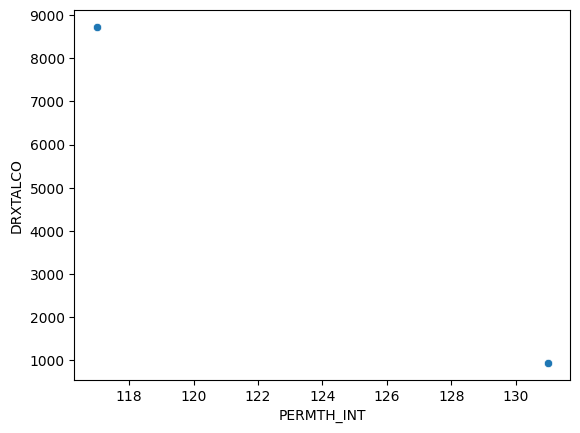

In [30]:
sns.scatterplot(new_df, x="PERMTH_INT", y="DRXTALCO")